# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

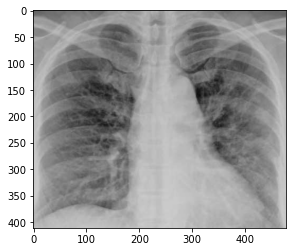

In [2]:
plt.imshow(cv2.imread("/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-001.jpg"))

# Import Data

## Import train dataset

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [5]:
training_set = train_datagen.flow_from_directory("/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train",
                                                color_mode = "rgb",
                                                class_mode = "binary",
                                                batch_size = 16,
                                                target_size = (1000, 1000, 3)[:2])

Found 148 images belonging to 2 classes.


## Import Test dataset

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
test_set = test_datagen.flow_from_directory("/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test",
                                           color_mode = "rgb",
                                           class_mode = "binary",
                                           batch_size = 16,
                                           target_size = (1000, 1000, 3)[:2])

Found 40 images belonging to 2 classes.


# Create CNN

## Add First Convolution Layer

In [8]:
cnn = tf.keras.models.Sequential()

2023-02-13 05:37:59.604221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 05:37:59.700210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 05:37:59.701075: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 05:37:59.702746: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (1000, 1000, 3)))

## Add Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

## Add Second Convolution Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"))

## Add Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

## Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

## Add Full conection

In [14]:
cnn.add(tf.keras.layers.Dense(128, activation = "relu"))

## Add Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

# Train CNN

In [16]:
cnn.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

2023-02-13 05:38:06.728780: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-02-13 05:38:12.372840: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


10/10 [==============================] - 46s 4s/step - loss: 33.8872 - accuracy: 0.6284 - val_loss: 0.0917 - val_accuracy: 0.9750
Epoch 2/10
10/10 [==============================] - 38s 4s/step - loss: 0.8909 - accuracy: 0.7500 - val_loss: 1.2147 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 37s 4s/step - loss: 0.8029 - accuracy: 0.8176 - val_loss: 0.0526 - val_accuracy: 0.9750
Epoch 4/10
10/10 [==============================] - 38s 4s/step - loss: 0.8841 - accuracy: 0.7297 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 38s 4s/step - loss: 0.5401 - accuracy: 0.8378 - val_loss: 0.1896 - val_accuracy: 0.9500
Epoch 6/10
10/10 [==============================] - 37s 4s/step - loss: 0.4489 - accuracy: 0.8041 - val_loss: 0.2297 - val_accuracy: 0.9750
Epoch 7/10
10/10 [==============================] - 38s 4s/step - loss: 0.2817 - accuracy: 0.8784 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 8/10
10/10 [============

In [18]:
df_hist = pd.DataFrame(cnn.history.history)
df_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,33.887161,0.628378,0.091694,0.975
1,0.890901,0.750000,1.214688,0.500
2,0.802866,0.817568,0.052588,0.975
3,0.884130,0.729730,0.044482,1.000
4,0.540112,0.837838,0.189580,0.950


In [19]:
arr_num = np.arange(10)

In [20]:
import seaborn as sns

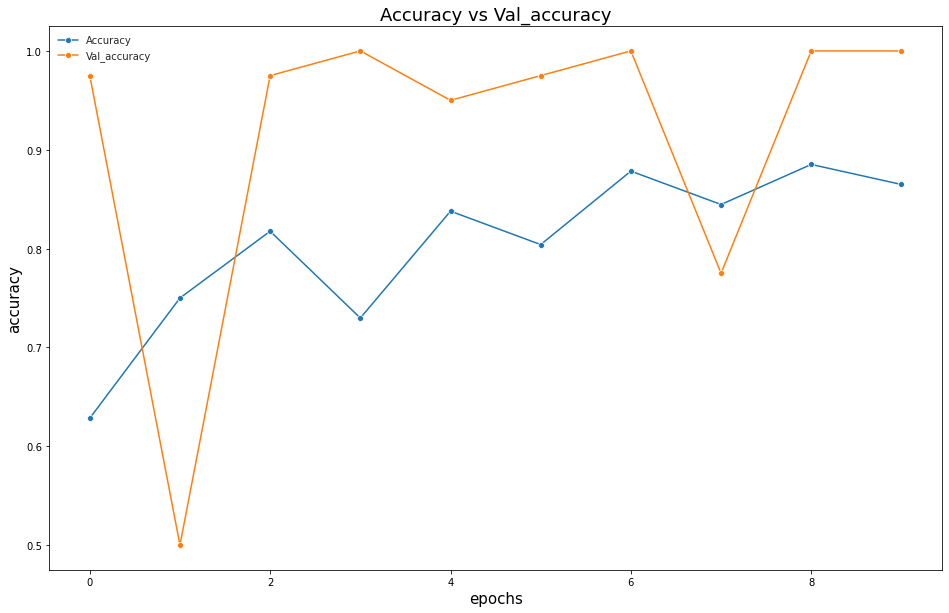

In [21]:
plt.figure(figsize = (16, 10))
plt.legend()
plt.style.use("seaborn-whitegrid")
sns.lineplot(x = arr_num, y = df_hist["accuracy"], marker = "o", label = "Accuracy")
sns.lineplot(x = arr_num, y = df_hist["val_accuracy"], marker = "o", label = "Val_accuracy")
plt.title("Accuracy vs Val_accuracy", fontsize = 18)
plt.xlabel("epochs" ,fontsize = 15)
plt.ylabel("accuracy", fontsize = 15)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.legend()

# Test one pic from Internet

![](https://prod-images-static.radiopaedia.org/images/52212995/8a7486782d3933ccd9aefbce323169_jumbo.jpeg)

In [22]:
test_im = tf.keras.utils.load_img("/kaggle/input/test-image-xray/8a7486782d3933ccd9aefbce323169_jumbo.jpg", target_size = (1000, 1000, 3))

In [23]:
test_im = tf.keras.utils.img_to_array(test_im)

In [24]:
test_im

array([[[ 82.,  82.,  82.],
        [141., 141., 141.],
        [137., 137., 137.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[143., 143., 143.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[148., 148., 148.],
        [248., 248., 248.],
        [254., 254., 254.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[136., 136., 136.],
        [255., 255., 255.],
        [251., 251., 251.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[150., 150., 150.],
        [250., 250., 250.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 75.,  75.,  75.],
        [151., 151., 151.],
        [139., 1

In [25]:
test_im = np.expand_dims(test_im, axis = 0)

In [26]:
test_im.shape

(1, 1000, 1000, 3)

In [27]:
cnn.predict(test_im)

array([[1.]], dtype=float32)

In [28]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}